<a href="https://colab.research.google.com/github/rania593/checkpoint-python/blob/main/DecisionTree_and_Random_forest_%2C_Chekpoint6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing our dataset from csv file
import pandas as pd 
import matplotlib as plt
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [ ]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#features extraction
feature_cols = ["Sex","Age","Pclass"]
x=data[feature_cols]
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tre = tree.DecisionTreeClassifier()  
tre.fit(x_train, y_train)   #fitting our model
y_pred=tre.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))#applying tree algorithm


score:0.8044692737430168


In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x, y)

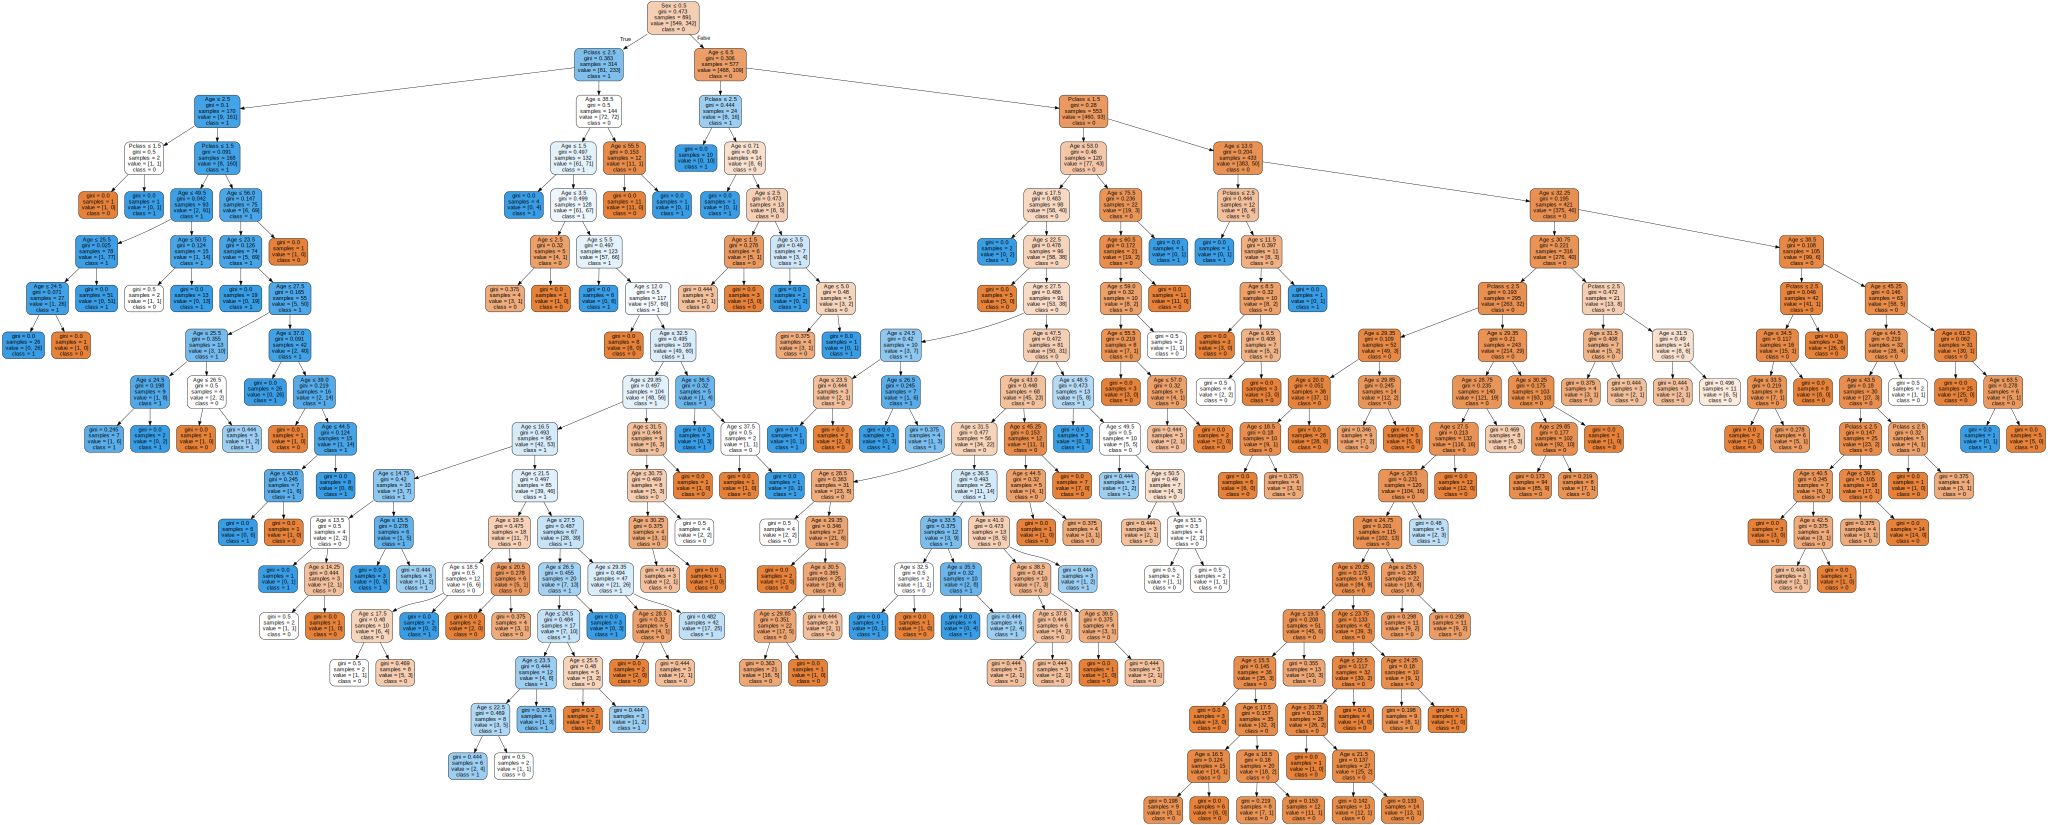

In [ ]:
#visualisation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

dot_data =tree.export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = graphviz.Source(dot_data, format="png") 
graph

#Analysing : 
we created the decision tree of the (survivig) option for passengers , 
depending on the 3 others features ( sex, age and Pclass) .
the tree contains a lot of nodes and samples , and the gini which is : \\
-The gini impurity which quantify how incertain we are of an outcome.\\
-Class: it is the result we're surching for ( surviving or not)

Optimizing Decision Tree Performance:

to simplfy the tree and make it easy to read , we use purning 

In [ ]:
#applying tree algorithm
tre = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3,max_leaf_nodes=6,min_samples_leaf=5)  
tre.fit(x_train, y_train)   #fitting our model
y_pred=tre.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))#applying tree algorithm


score:0.7988826815642458


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3,max_leaf_nodes=6,min_samples_leaf=5)
clf = clf.fit(x_train,y_train)

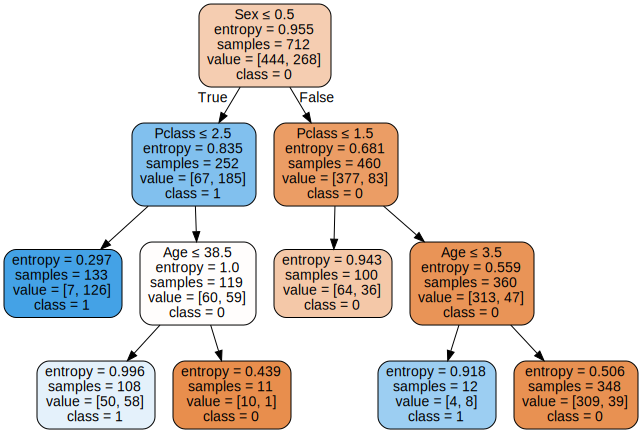

In [ ]:
dot_data =tree.export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = graphviz.Source(dot_data, format="png") 
graph

#Explenation :
After purning our tree by limiting the number of nodes , we obtain a lower accuracy number because we are at the same time reducing information and also losing the precision .


#Random Forest

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

iris = datasets.load_iris()

data=pd.DataFrame({
'sepal length': iris.data[:,0],
'sepal width': iris.data[:,1],
'petal length': iris.data[:,2],
'petal width': iris.data[:,3], 
'species': iris.target
})

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] #features
y=data['species']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

In [ ]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.9555555555555556


The accuracy in this case is very important than the case of decision tree

---

